## Data Exploration and Visualization of the NYC Department of Building Job Permits Issuance Dataset

This notebook will visualize the number and types of permits that has been issued by the NYC Department of Building.

Source dataset found [here](https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a).

In [1]:
import os
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib inline

from helper_scripts.cleaning_scripts import *

In [2]:
raw_permits_data_path = os.path.join('..', 'data', 'raw', 'DOB_job_permits.csv')
df = pd.read_csv(raw_permits_data_path, low_memory=False)
df.head()

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,Community Board,Zip Code,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Permittee's Phone #,Permittee's License Type,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,QUEENS,4258653,111-43,144 STREET,421952809,1,A2,Y,11960,00017,412,11435.0,1.0,YES,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,06/06/2019 12:00:00 AM,06/06/2019 12:00:00 AM,06/05/2020 12:00:00 AM,06/06/2019 12:00:00 AM,AUSENCIO,SANTOS,"JL PLUMBING, LLC",7184555500,MP,0002104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,NORMA,SINGH,111-43,144TH STREET,QUEENS,NY,11435,9176570199,06/07/2019 12:00:00 AM,3646662,40.685287,-73.800182,28.0,194.0,South Jamaica
1,MANHATTAN,1032204,112,WEST 87TH STREET,123292212,3,A1,N,01217,00039,107,10024.0,1.0,NaN,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NaN,06/06/2019 12:00:00 AM,06/06/2019 12:00:00 AM,06/05/2020 12:00:00 AM,06/06/2019 12:00:00 AM,WILLIAM,BRESALIER,L&J PLG & HTG CO OF NY IN,7188494747,MP,0000945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,SOPHIE,SACCA,112,WEST 87TH STREET,NEW YORK,NY,10024,9177161525,06/07/2019 12:00:00 AM,3646661,40.787438,-73.972356,6.0,173.0,Upper West Side
2,BROOKLYN,3024868,784,CARROLL STREET,322061610,1,A2,N,01069,00020,306,11215.0,2.0,YES,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,06/06/2019 12:00:00 AM,06/06/2019 12:00:00 AM,06/05/2020 12:00:00 AM,06/06/2019 12:00:00 AM,WILLIAM,BRESALIER,L&J PLG & HTG CO OF NY IN,7188494747,MP,0000945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONDO/CO-OP,N,NaN,BERNADETTE,SERTON,784,CARROLL STREET,BROOKLYN,NY,11215,2023294771,06/07/2019 12:00:00 AM,3646659,40.672911,-73.975609,39.0,157.0,Park Slope-Gowanus
3,QUEENS,4439898,56-45,MAIN STREET,421623540,2,A2,N,05165,00001,407,11355.0,2.0,NaN,NaN,NaN,MH,ISSUED,RENEWAL,EW,2,MH,NaN,NaN,06/06/2019 12:00:00 AM,06/06/2019 12:00:00 AM,01/01/2020 12:00:00 AM,11/01/2018 12:00:00 AM,KEVIN,BARRETT,HUNTER ROBERTS CONST. GRP,2123216800,GC,0032144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,Y,NEW YORK PRESBYTERIAN QUEENS,ANTHONY,RUIZ,56-45,MAIN STREET,FLUSHING,NY,11355,7186702827,06/07/2019 12:00:00 AM,3646078,40.746817,-73.826155,20.0,799.0,Queensboro Hill
4,QUEENS,4077083,100-27,METROPOLITAN AVENUE,421742252,1,A1,N,03220,00053,406,11375.0,2.0,NaN,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,06/06/2019 12:00:00 AM,06/06/2019 12:00:00 AM,06/05/2020 12:00:00 AM,06/06/2019 12:00:00 AM,MICHAL,NATKANIEC,AMN PLUMBING CORP,7183669600,MP,0002428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,METROPOLITAN FOOD COURT,PETER,BIVONA,100-27,METROPOLITAN AVENUE,FOREST HILLS,NY,11375,9173344100,06/07/2019 12:00:00 AM,3646390,40.710741,-73.852559,29.0,729.0,Forest Hills


In [3]:
df.columns = [clean_col_name(x) for x in df.columns] ## Clean-up ugly column names

df['Filing_month'] = get_month(df['Filing_Date'])
df['Filing_year'] = get_year(df['Filing_Date'])
df['Filing_Date'] = get_date(df['Filing_Date'])

## Mapping of NTA (neighborhood) to Borough
df_boro_NTA = df[['BOROUGH', 'NTA_NAME']].drop_duplicates().dropna() 
df.head()

,BOROUGH,Bin_Num,House_Num,Street_Name,Job_Num,Job_doc_Num,Job_Type,Self_Cert,Block,Lot,Community_Board,Zip_Code,Bldg_Type,Residential,Special_District_1,Special_District_2,Work_Type,Permit_Status,Filing_Status,Permit_Type,Permit_Sequence_Num,Permit_Subtype,Oil_Gas,Site_Fill,Filing_Date,Issuance_Date,Expiration_Date,Job_Start_Date,Permittees_First_Name,Permittees_Last_Name,Permittees_Business_Name,Permittees_Phone_Num,Permittees_License_Type,Permittees_License_Num,Act_as_Superintendent,Permittees_Other_Title,HIC_License,Site_Safety_Mgrs_First_Name,Site_Safety_Mgrs_Last_Name,Site_Safety_Mgr_Business_Name,Superintendent_First_&_Last_Name,Superintendent_Business_Name,Owners_Business_Type,NonProfit,Owners_Business_Name,Owners_First_Name,Owners_Last_Name,Owners_House_Num,Owners_House_Street_Name,Owner’s_House_City,Owner’s_House_State,Owner’s_House_Zip_Code,Owners_Phone_Num,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME,Filing_month,Filing_year
0,QUEENS,4258653,111-43,144 STREET,421952809,1,A2,Y,11960,00017,412,11435.0,1.0,YES,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,2019-06-06,06/06/2019 12:00:00 AM,06/05/2020 12:00:00 AM,06/06/2019 12:00:00 AM,AUSENCIO,SANTOS,"JL PLUMBING, LLC",7184555500,MP,0002104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,NORMA,SINGH,111-43,144TH STREET,QUEENS,NY,11435,9176570199,06/07/2019 12:00:00 AM,3646662,40.685287,-73.800182,28.0,194.0,South Jamaica,6.0,2019.0
1,MANHATTAN,1032204,112,WEST 87TH STREET,123292212,3,A1,N,01217,00039,107,10024.0,1.0,NaN,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NaN,2019-06-06,06/06/2019 12:00:00 AM,06/05/2020 12:00:00 AM,06/06/2019 12:00:00 AM,WILLIAM,BRESALIER,L&J PLG & HTG CO OF NY IN,7188494747,MP,0000945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,SOPHIE,SACCA,112,WEST 87TH STREET,NEW YORK,NY,10024,9177161525,06/07/2019 12:00:00 AM,3646661,40.787438,-73.972356,6.0,173.0,Upper West Side,6.0,2019.0
2,BROOKLYN,3024868,784,CARROLL STREET,322061610,1,A2,N,01069,00020,306,11215.0,2.0,YES,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,2019-06-06,06/06/2019 12:00:00 AM,06/05/2020 12:00:00 AM,06/06/2019 12:00:00 AM,WILLIAM,BRESALIER,L&J PLG & HTG CO OF NY IN,7188494747,MP,0000945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONDO/CO-OP,N,NaN,BERNADETTE,SERTON,784,CARROLL STREET,BROOKLYN,NY,11215,2023294771,06/07/2019 12:00:00 AM,3646659,40.672911,-73.975609,39.0,157.0,Park Slope-Gowanus,6.0,2019.0
3,QUEENS,4439898,56-45,MAIN STREET,421623540,2,A2,N,05165,00001,407,11355.0,2.0,NaN,NaN,NaN,MH,ISSUED,RENEWAL,EW,2,MH,NaN,NaN,2019-06-06,06/06/2019 12:00:00 AM,01/01/2020 12:00:00 AM,11/01/2018 12:00:00 AM,KEVIN,BARRETT,HUNTER ROBERTS CONST. GRP,2123216800,GC,0032144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,Y,NEW YORK PRESBYTERIAN QUEENS,ANTHONY,RUIZ,56-45,MAIN STREET,FLUSHING,NY,11355,7186702827,06/07/2019 12:00:00 AM,3646078,40.746817,-73.826155,20.0,799.0,Queensboro Hill,6.0,2019.0
4,QUEENS,4077083,100-27,METROPOLITAN AVENUE,421742252,1,A1,N,03220,00053,406,11375.0,2.0,NaN,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,2019-06-06,06/06/2019 12:00:00 AM,06/05/2020 12:00:00 AM,06/06/2019 12:00:00 AM,MICHAL,NATKANIEC,AMN PLUMBING CORP,7183669600,MP,0002428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,METROPOLITAN FOOD COURT,PETER,BIVONA,100-27,METROPOLITAN AVENUE,FOREST HILLS,NY,11375,9173344100,06/07/2019 12:00:00 AM,3646390,40.710741,-73.852559,29.0,729.0,Forest Hills,6.0,2019.0


In this section I will focus on the *Job_Type* column in the dataset, which as the name implies the type of permit the job is for. For example, **NB** is a job type that indicates a new building, while **DM** indicates a demolition. For more details on the job type, follow this [link](https://www1.nyc.gov/site/buildings/homeowner/permits.page).

In the next cell I will create several functions that will convert the dataset into a rolling count by permit type, which will then be plotted as a timeseries plot. The motivation for creating a rolling count dataset is to smooth out the noises of daily permit issuance so the general trends can be captured for any specific area.

In [4]:
def create_rolling_permits_NTA(df, NTA=None, boro=None, rolling=90, start='5/1/1989', end='3/22/2019'):
    """
    A function that will create a rolling dataframe of the count by the Job Type.
    df - input dataframe assumes the DOB permits dataframe
    NTA - if NTA is passed then output will be only the A1/A2/DM/NB for just this NTA
    boro - if boro is passed then output will be A1/A2/DM/NB for all NTA associated with borough
    rolling - default 90 days
    if both NTA/boro is None all will be calculated and outputed
    """
    if NTA is not None:
        df_groupby = df[df['NTA_NAME']==NTA].groupby(['Filing_Date', 'Job_Type']).size().reset_index().rename(columns={0: 'count'})
        df_groupby = pd.pivot_table(df_groupby, index='Filing_Date', values='count', columns='Job_Type')
    elif boro is not None: 
        df_groupby = df[df['BOROUGH']==boro].groupby(['Filing_Date', 'Job_Type', 'NTA_NAME']).size().reset_index().rename(columns={0: 'count'})
        df_groupby['Job_Neighborhood'] = df_groupby['Job_Type'] + '_' + df_groupby['NTA_NAME']
        df_groupby = pd.pivot_table(df_groupby, index='Filing_Date', values='count', columns='Job_Neighborhood')
    else:
        df_groupby = df.groupby(['Filing_Date', 'Job_Type', 'NTA_NAME']).size().reset_index().rename(columns={0: 'count'})
        df_groupby['Job_Neighborhood'] = df_groupby['Job_Type'] + '_' + df_groupby['NTA_NAME']
        df_groupby = pd.pivot_table(df_groupby, index='Filing_Date', values='count', columns='Job_Neighborhood')
        
    ## function imported from cleaning_scripts to create rolling sum by date
    df_rolling = create_sum_rolling_dates(df_groupby, rolling=rolling, start=start, end=end)
    
    return(df_rolling)

df_rolling = create_rolling_permits_NTA(df)

def get_NTA(df, NTA, agg=False, job_type=['NB', 'DM', 'A1', 'A2']):
    """
    Convenience function to strip out specific NTA's (neighborhood) from the above df_rolling. 
    Can pass a single NTA or a list of NTA's along with interested job type.
    df - rolling data frame
    NTA - accepts either string (of a single neighborhood) or list of NTA's
    agg - default - False. If True it will aggregate it all and return the aggregated count by job type.
    job_type - list of interested job types
    """
    if isinstance(NTA, str):
        col_names = [x for x in df.columns if '_' + NTA in x]
        return(df[col_names])
    elif isinstance(NTA, list):
        col_names = [x for y in NTA for x in df.columns if '_' + y in x]                

        if agg==True:
            df_agg=pd.DataFrame(index=df.index, columns=job_type)
            for job in job_type:
                agg_columns = [x for x in col_names if job in x]
                df_agg[job] = df[agg_columns].sum(axis=1)            
            return(df_agg)
        else:
            return(df[col_names])

def plot_permits_count(df, job_type=['NB', 'DM', 'A1', 'A2'], plot_title=None):
    """
    Plots timeseries of the count
    df - expects date as index with counts pertaining to the job + NTA combination
    """
    NTA_list = list(set([x[3:] for x in df.columns]))
    nrows=len(NTA_list)
    
    if nrows == 1:
        col_names = [x for x in df.columns if x[0:2] in job_type]
        df[col_names].plot(figsize=(20,10), title=plot_title)
    else:
        fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(20, 10*nrows))
        for n in range(nrows):
            col_names = [x for x in df.columns if x[0:2] in job_type and x[3:] == NTA_list[n]]
            axes[n].set_title(NTA_list[n])
            axes[n].title.set_fontsize(22)
            axes[n].legend(prop=dict(size=20))
            df[col_names].plot(ax=axes[n], fontsize=18)
            
        #plt.tight_layout()
        plt.show()

Above functions in action.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


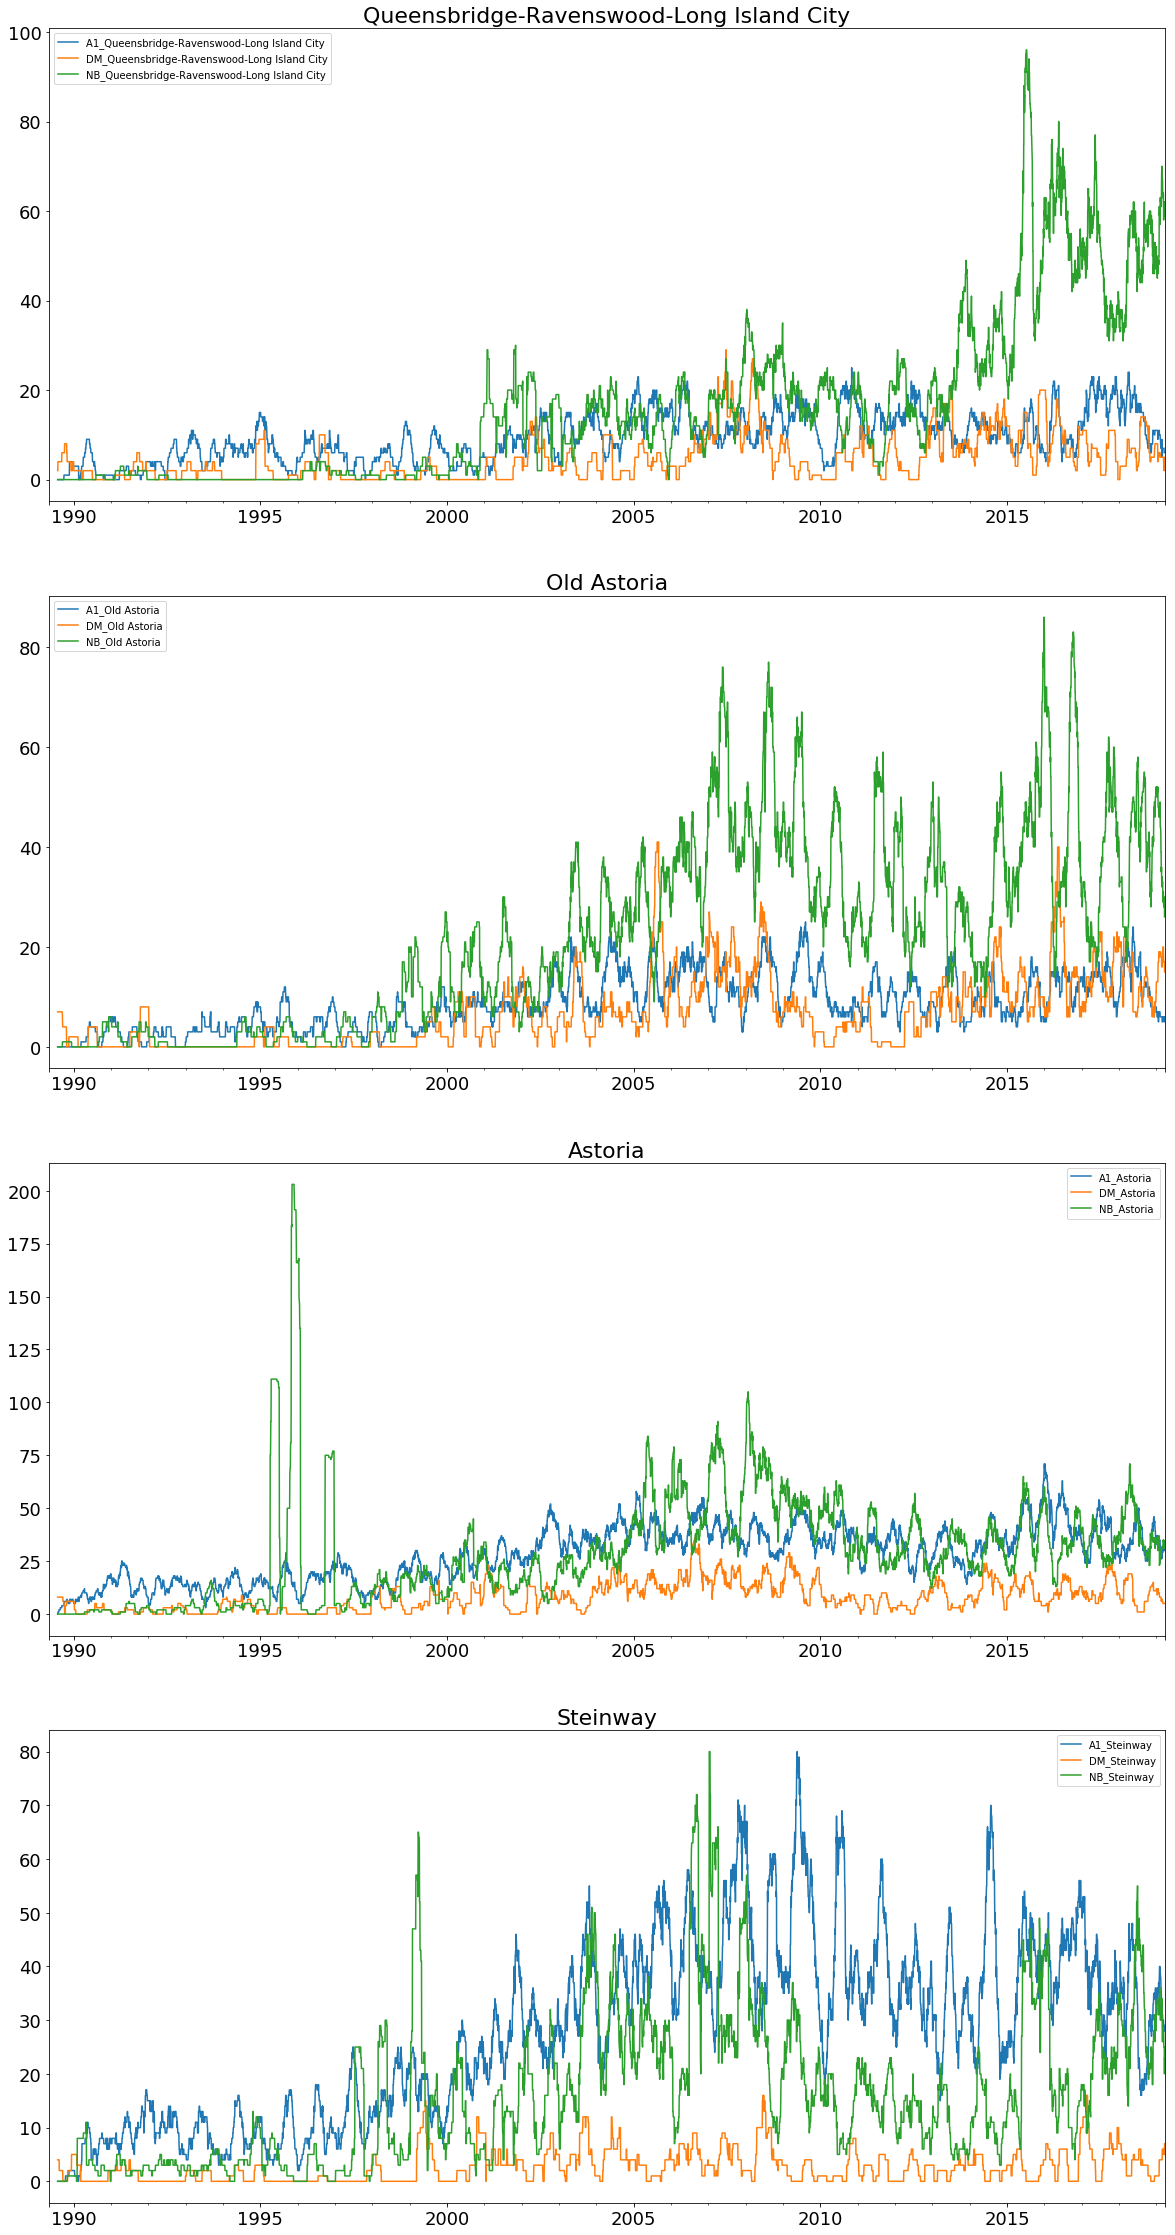

In [6]:
NTA = ['Astoria', 'Steinway', 'Old Astoria', 'Queensbridge-Ravenswood-Long Island City']
job_type=['NB', 'DM', 'A1']
plot_permits_count(get_NTA(df_rolling, NTA=NTA, job_type=job_type), job_type=job_type)

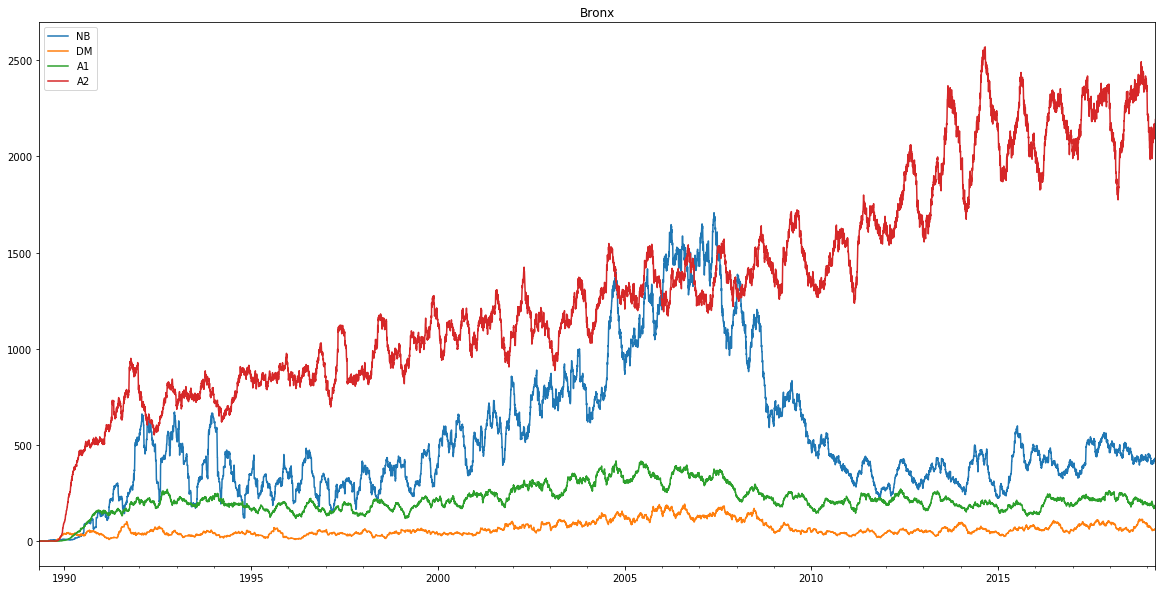

In [7]:
## Take a look at specific boroughs across time
NTA = df_boro_NTA[df_boro_NTA['BOROUGH']=='BRONX']['NTA_NAME'].tolist()
plot_permits_count(get_NTA(df_rolling, NTA=NTA, agg=True), plot_title='Bronx')